# steps

- load the dataset
- train test split
- standardize the data
- train the model
- evaluate the model
- visualize the results

In [1]:
from IPython.display import display
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset

df = pd.read_csv("assets/email_spam_classification.csv")

In [3]:
# train test split

columns_to_drop = ['Email No.', 'spam']
X = df.drop(columns=columns_to_drop, axis=1)
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# standardize the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## baseline model

In [5]:
# Train the baseline model

baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

In [6]:
# Evaluate the baseline model

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='weighted', zero_division=1)
recall_baseline = recall_score(y_test, y_pred_baseline, average='weighted', zero_division=1)
f1_baseline = f1_score(y_test, y_pred_baseline, average='weighted')

print(f"Baseline Model - Accuracy: {accuracy_baseline:.3f}")
print(f"Baseline Model - Precision: {precision_baseline:.3f}")
print(f"Baseline Model - Recall: {recall_baseline:.3f}")
print(f"Baseline Model - F1 Score: {f1_baseline:.3f}")

Baseline Model - Accuracy: 0.994
Baseline Model - Precision: 0.995
Baseline Model - Recall: 0.994
Baseline Model - F1 Score: 0.995


In [ ]:
# visualize the confusion matrix using seaborn's heatmap

cm = confusion_matrix(y_test, y_pred_baseline)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## cross validation model

In [7]:
# Use cross-validation to evaluate the model

cv_scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Cross-Validation Mean Accuracy: {cv_scores.mean():.3f}")

/Users/hi/jitenStuff/MyGit/AI-ML-DL/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99154589 0.99516908 0.99274486 0.99274486 0.99032648]
Cross-Validation Mean Accuracy: 0.993


In [8]:
# Train the model with cross-validation

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model with cross-validation

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Cross-Validated Model - Accuracy: {accuracy:.3f}")
print(f"Cross-Validated Model - Precision: {precision:.3f}")
print(f"Cross-Validated Model - Recall: {recall:.3f}")
print(f"Cross-Validated Model - F1 Score: {f1:.3f}")

Cross-Validated Model - Accuracy: 0.994
Cross-Validated Model - Precision: 0.995
Cross-Validated Model - Recall: 0.994
Cross-Validated Model - F1 Score: 0.995


In [ ]:
# Visualize the confusion matrix using seaborn's heatmap

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## K-Nearest Neighbors (KNN) model

In [10]:
# Train the K-Nearest Neighbors (KNN) model

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [11]:
# Evaluate the KNN model

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=1)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=1)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f"KNN - Accuracy: {accuracy_knn:.3f}")
print(f"KNN - Precision: {precision_knn:.3f}")
print(f"KNN - Recall: {recall_knn:.3f}")
print(f"KNN - F1 Score: {f1_knn:.3f}")

KNN - Accuracy: 0.997
KNN - Precision: 0.997
KNN - Recall: 0.997
KNN - F1 Score: 0.997


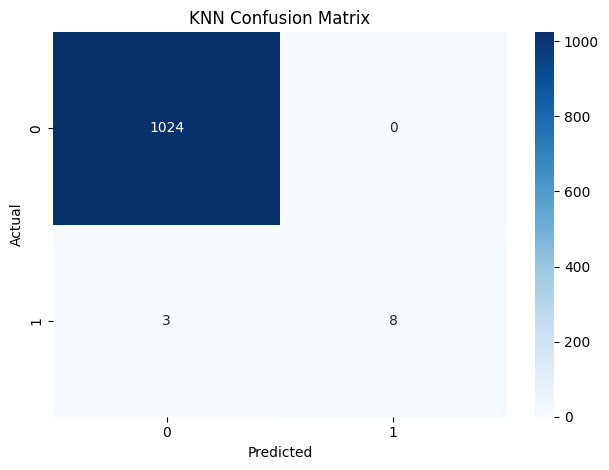

In [13]:
# Visualize the confusion matrix for KNN

cm_knn = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()